In [37]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np
import os
import seaborn as sns
import cartogram

In [2]:
# Get the list of all shp files in BCN500 directory
dir_cat = [x for x in os.listdir("../Notebooks/MapFiles/") if x[-4:]==".shp"]
# first number: resolution/ scale, second number: Date
dir_cat = [x for x in os.listdir("../Notebooks/MapFiles/") if x[-20:]=="-500000-20250730.shp"]
ids = {x:x[31:-20] for x in dir_cat}

In [3]:
ids

{'divisions-administratives-v2r1-municipis-500000-20250730.shp': 'municipis',
 'divisions-administratives-v2r1-comarques-500000-20250730.shp': 'comarques',
 'divisions-administratives-v2r1-catalunya-500000-20250730.shp': 'catalunya',
 'divisions-administratives-v2r1-provincies-500000-20250730.shp': 'provincies',
 'divisions-administratives-v2r1-vegueries-500000-20250730.shp': 'vegueries'}

In [4]:
cat_maps = {}
maps = dir_cat[0]
cat_maps[ids[maps]] = gpd.read_file("../Notebooks/MapFiles/"+maps)
municipis = cat_maps[ids[maps]]
municipis['NOMREGIO'] = ""
# We build the regions that the Competencies data set uses
#1
municipis.loc[municipis["NOMPROV"] == "Lleida", "NOMREGIO"] = "Lleida"
#2
municipis.loc[municipis["NOMPROV"] == "Girona", "NOMREGIO"] = "Girona"
#3
municipis.loc[municipis["NOMPROV"] == "Tarragona", "NOMREGIO"] = "Tarragona"
#4
municipis.loc[municipis["NOMPROV"] == "Barcelona", "NOMREGIO"] = "Barcelona Comarques"
#5
municipis.loc[municipis["NOMVEGUE"] == "Penedès", "NOMREGIO"] = "Penedès"
#6
municipis.loc[municipis["NOMVEGUE"] == "Terres de l'Ebre", "NOMREGIO"] = "Terres de l'Ebre"
#7
municipis.loc[municipis["NOMVEGUE"] == "Catalunya Central", "NOMREGIO"] = "Catalunya Central"
#8
municipis.loc[municipis["NOMVEGUE"] == "Alt Pirineu", "NOMREGIO"] = "Alt Pirineu i Aran"
municipis.loc[municipis["NOMVEGUE"] == "Val d'Aran (entitat territorial singular)", "NOMREGIO"] = "Alt Pirineu i Aran"

#9
municipis.loc[municipis["NOMCOMAR"] == "Vallès Occidental", "NOMREGIO"] = "Vallès Occidental"

#10
municipis.loc[municipis["NOMCOMAR"] == "Vallès Oriental", "NOMREGIO"] = "Maresme - Vallès Oriental"
municipis.loc[municipis["NOMCOMAR"] == "Maresme", "NOMREGIO"] = "Maresme - Vallès Oriental"
municipis.loc[municipis["NOMCOMAR"] == "Selva", "NOMREGIO"] = "Maresme - Vallès Oriental"

#11
municipis.loc[municipis["NOMCOMAR"] == "Baix Llobregat", "NOMREGIO"] = "Baix Llobregat"

#12
municipis.loc[municipis["NOMMUNI"] == "Barcelona", "NOMREGIO"] = "Consorci d'Educació de Barcelona"
#municipis.loc[municipis["NOMMUNI"] == "Barcelonès", "NOMREGIO"] = "Consorci d'Educació de Barcelona"
#print(len(set(municipis["NOMREGIO"])))


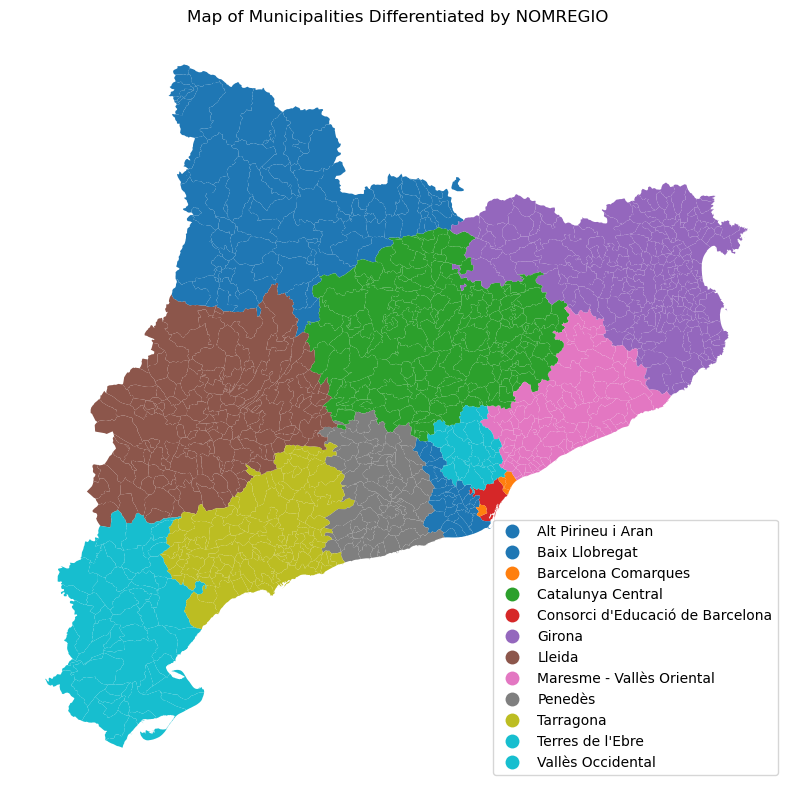

In [5]:
cat_mfig, ax = plt.subplots(figsize=(10, 10))
municipis.plot(column='NOMREGIO', ax=ax, legend=True, legend_kwds={'loc': 'lower right'})

# Customize the plot
plt.title('Map of Municipalities Differentiated by NOMREGIO')
plt.axis('off')  # Turn off the axes
plt.show()

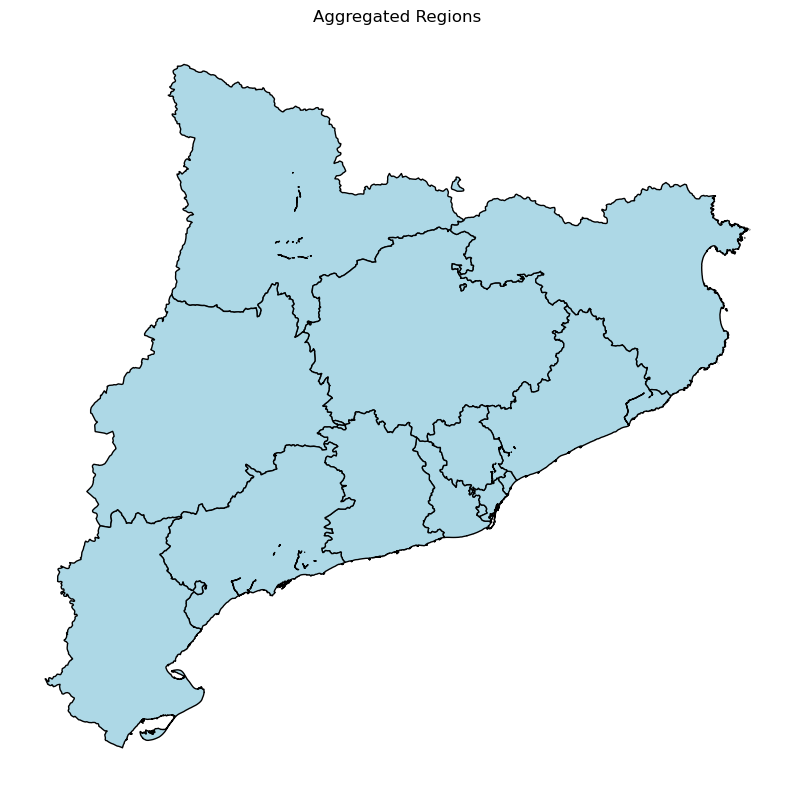

In [6]:
aggregated_regions = municipis.dissolve(by="NOMREGIO")

# Keep only the NOMREGIO and geometry columns in the new GeoDataFrame
aggregated_regions = aggregated_regions.reset_index()[["NOMREGIO", "geometry"]]

# Plot the aggregated regions
fig, ax = plt.subplots(figsize=(10, 10))
aggregated_regions.plot(ax=ax, color='lightblue', edgecolor='black')

# Customize the plot
plt.title('Aggregated Regions')
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [7]:
# Load from CSV
df_s = pd.read_csv("../Data/Secundaria.csv", header=0)
df_p = pd.read_csv("../Data/Primaria.csv", header=0)

# Replace empty values (or just spaces) with a NaN
df_s.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df_p.replace(r'^\s*$', np.nan, regex=True, inplace=True)

#  str -> float
cols_to_clean = [
    'ANY', 'ANY_NAIXEMENT', 'MES_NAIXEMENT',
    'PANG','PANG_CO','PANG_EE','PCAST','PCAST_CL','PCAST_EE',
    'PCAT','PCAT_CL','PCAT_EE','PFRAN','PFRAN_CO','PFRAN_EE',
    'PMAT','PMAT_CR','PMAT_EFM','PMAT_NC'
]

# euro decimal -> decimal
for col in cols_to_clean:
    if col in df_s.columns:
        df_s[col] = (
            df_s[col]
            .astype(str)
            .str.replace(',', '.', regex=False)
            .astype(float)
        )
        
        
    if col in df_p.columns:
        
        df_p[col] = (
            df_p[col]
            .astype(str)
            .str.replace(',', '.', regex=False)
            .astype(float)
        )
df_p["AREA_TERRITORIAL"] = df_p["AREA_TERRITORIAL"].replace("Barcelonès", "Barcelona Comarques")
df_s["AREA_TERRITORIAL"] = df_s["AREA_TERRITORIAL"].replace("Barcelonès", "Barcelona Comarques")
df_p['CODI_ALUMNE'] = df_p['CODI_ALUMNE'].astype(int)
df_s['CODI_ALUMNE'] = df_s['CODI_ALUMNE'].astype(int)

/var/folders/_m/vj49vq3972b166bph370j1kw0000gn/T/ipykernel_11684/1049403812.py:2: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_s = pd.read_csv("../Data/Secundaria.csv", header=0)


In [8]:
municipis.to_file("../Notebooks/MapFiles/municipis.shp", driver="ESRI Shapefile")
aggregated_regions.to_file("../Notebooks/MapFiles/regions.shp", driver="ESRI Shapefile")

In [9]:
municipis = gpd.read_file("../Notebooks/MapFiles/municipis.shp")

/Users/peterclark/opt/anaconda3/envs/ub-bigdata-viz/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(


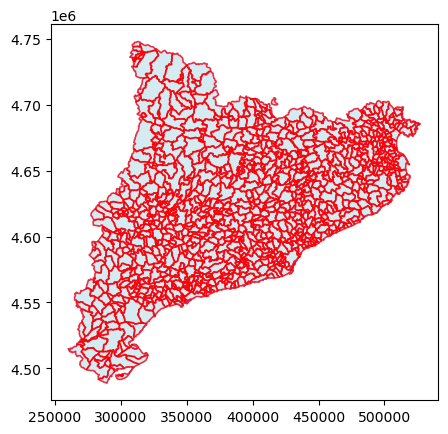

In [10]:
maps = dir_cat[0]
cat_maps[ids[maps]] = gpd.read_file("../Notebooks/MapFiles/"+maps, crs="EPSG:4326")
prvncs = cat_maps[ids[maps]]

fig, ax = plt.subplots(figsize=(5, 5))

municipis.plot(ax=ax, color='lightblue', edgecolor='blue', linewidth=0.5, alpha=0.5, label="Municipalities")
prvncs.plot(ax=ax, color='none', edgecolor='red', linewidth=1.2, alpha=0.7, label="Provinces")
plt.show()

In [11]:
df_s["CODI_ALUMNE"].groupby(by=df_s["AREA_TERRITORIAL"]).count()
df_p["ANY"].groupby(by=df_p["ANY"]).count()
df_p["NATURALESA"].value_counts()/df_p["NATURALESA"].count()
df_p["CODI_ALUMNE"].groupby(by=df_s["AREA_TERRITORIAL"]).count()

AREA_TERRITORIAL
Alt Pirineu i Aran                    476
Baix Llobregat                      29333
Barcelona Comarques                 24189
Catalunya Central                   17391
Consorci d'Educació de Barcelona    42753
Girona                              25721
Lleida                              12870
Maresme - Vallès Oriental           32610
Penedès                              4351
Tarragona                           20915
Terres de l'Ebre                     5105
Vallès Occidental                   36460
Name: CODI_ALUMNE, dtype: int64

In [12]:
regions = aggregated_regions.dissolve(by="NOMREGIO", as_index=False)

# 2. Merge your dataset
merged_s = regions.merge(
    df_s.groupby(by='AREA_TERRITORIAL', as_index=True).agg({
        'PCAT':lambda x: x[x != 0].mean(skipna=True),
        'PCAST':lambda x: x[x != 0].mean(skipna=True),
        'PANG':lambda x: x[x != 0].mean(skipna=True),
        'PMAT':lambda x: x[x != 0].mean(skipna=True),
        'GENERE': lambda x: (x == "D").sum() / x.count(),
        'NATURALESA': lambda y: (y=="Privat").sum() / y.count()
        }),
    left_on="NOMREGIO",
    right_on="AREA_TERRITORIAL",
    how="left"
)

merged_p = regions.merge(
    df_p.groupby(by='AREA_TERRITORIAL', as_index=True).agg({
        'PCAT':'mean',
        'PCAST':'mean',
        'PANG':'mean',
        'PMAT':'mean',
        'GENERE': lambda x: (x == "D").sum() / x.count(),
        'NATURALESA': lambda y: (y=="Privat").sum() / y.count()
        }),
    left_on="NOMREGIO",
    right_on="AREA_TERRITORIAL",
    how="left"
)

merged = merged_s.copy()

merged["PCAT"] = merged_s['PCAT'] - merged_p['PCAT']

In [13]:
merged_s

,NOMREGIO,geometry,PCAT,PCAST,PANG,PMAT,GENERE,NATURALESA
0,Alt Pirineu i Aran,"MULTIPOLYGON (((360318 4649978.6, 360549.37 46...",74.255819,74.779139,75.408182,62.875441,0.504202,0.0
1,Baix Llobregat,"POLYGON ((416496.693 4568594.713, 416494.027 4...",74.931789,77.372133,72.106342,65.724171,0.502098,0.0
2,Barcelona Comarques,"MULTIPOLYGON (((425643.494 4580870.724, 426121...",74.148037,76.510369,71.093216,64.819718,0.496158,0.0
3,Catalunya Central,"MULTIPOLYGON (((372739.998 4611200.116, 372750...",76.217994,75.923895,72.738887,66.080804,0.494890,0.0
4,Consorci d'Educació de Barcelona,"MULTIPOLYGON (((430609.43 4575741.58, 430559 4...",76.947193,78.150235,77.622868,69.076209,0.501673,0.0
5,Girona,"MULTIPOLYGON (((498502.48 4622858.49, 498503.1...",75.231003,75.904753,72.820144,66.767039,0.504646,0.0
6,Lleida,"POLYGON ((305710.945 4575698.189, 305587.545 4...",77.084833,77.302183,74.662584,67.718993,0.505127,0.0
7,Maresme - Vallès Oriental,"MULTIPOLYGON (((482722.454 4613228.564, 482724...",76.208052,77.205819,73.255427,66.727421,0.496380,0.0
8,Penedès,"MULTIPOLYGON (((386113.04 4561085.28, 386112.9...",71.702593,71.444043,72.384712,61.224993,0.500804,0.0
9,Tarragona,"MULTIPOLYGON (((335054.71 4547030.22, 335055.0...",74.497100,75.944906,70.592923,65.542097,0.503409,0.0


                    AREA_TERRITORIAL     ANY   PCAT  PCAST   PANG   PMAT
0                 Alt Pirineu i Aran  2023.0    452    453    440    454
1                     Baix Llobregat  2019.0      3      3      3      3
2                     Baix Llobregat  2020.0   6822   6823   6814   6829
3                     Baix Llobregat  2021.0   7385   7446   7429   7435
4                     Baix Llobregat  2022.0   7590   7609   7572   7611
5                     Baix Llobregat  2023.0   7525   7522   7459   7516
6                Barcelona Comarques  2019.0      2      3      1      3
7                Barcelona Comarques  2020.0   6011   5981   5932   6017
8                Barcelona Comarques  2021.0   6706   6797   6731   6756
9                Barcelona Comarques  2022.0   6814   6845   6751   6834
10               Barcelona Comarques  2023.0   4446   4445   4427   4446
11                 Catalunya Central  2019.0      4      6      5      6
12                 Catalunya Central  2020.0   4482

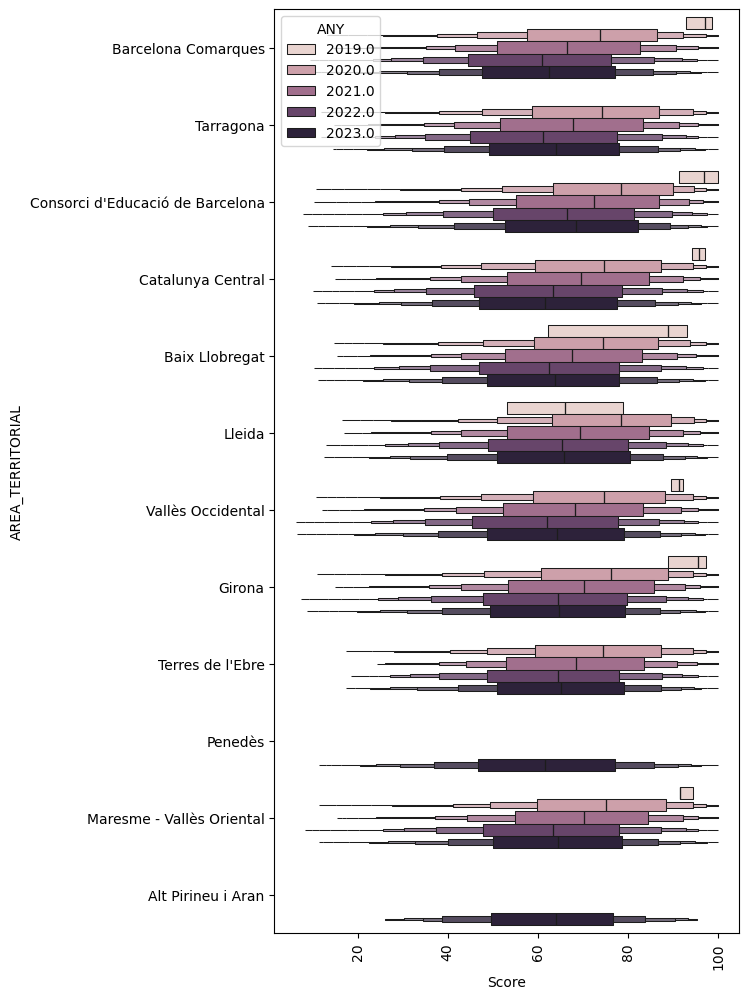

In [38]:
numeric_cols = ["PCAT", "PCAST", "PANG", "PMAT"]

counts = (
    df_s.groupby(["AREA_TERRITORIAL", "ANY"])[numeric_cols]
        .count()
        .reset_index()
)

print(counts)

# Melt to long format
df_long = df_s.melt(
    id_vars=["ANY","AREA_TERRITORIAL"], 
    value_vars=numeric_cols, 
    var_name="Examen", 
    value_name="Score"
)

df_long = df_long[df_long["Score"].notna()]       # drop NaNs
df_long = df_long[df_long["Score"] != 0]         # drop zeros
#df_long["ANY"] = df_long["ANY"].astype(str) 

plt.figure(figsize=(6,12))

sns.boxenplot(
    x="Score",
    y="AREA_TERRITORIAL",
    hue="ANY",    # one box per numeric column per area
    data=df_long[df_long["Examen"]=="PMAT"],
    showfliers=False,
    
)

plt.xticks(rotation=45)
plt.tick_params(axis='x', labelrotation=90)
#plt.legend(title="Variable", bbox_to_anchor=(1, 0.5))
plt.show()


In [39]:
merged_p

,NOMREGIO,geometry,PCAT,PCAST,PANG,PMAT,GENERE,NATURALESA
0,Alt Pirineu i Aran,"MULTIPOLYGON (((360318 4649978.6, 360549.37 46...",NaN,NaN,NaN,NaN,NaN,NaN
1,Baix Llobregat,"POLYGON ((416496.693 4568594.713, 416494.027 4...",75.283841,76.173967,77.974466,78.829952,0.503319,0.290961
2,Barcelona Comarques,"MULTIPOLYGON (((425643.494 4580870.724, 426121...",74.371948,75.148267,77.219953,77.814228,0.500461,0.381335
3,Catalunya Central,"MULTIPOLYGON (((372739.998 4611200.116, 372750...",76.182152,74.722592,77.720860,79.343174,0.497111,0.316492
4,Consorci d'Educació de Barcelona,"MULTIPOLYGON (((430609.43 4575741.58, 430559 4...",77.459448,77.978420,81.374949,80.393224,0.501193,0.616749
5,Girona,"MULTIPOLYGON (((498502.48 4622858.49, 498503.1...",76.001016,74.774623,78.249350,78.867907,0.505595,0.233921
6,Lleida,"POLYGON ((305710.945 4575698.189, 305587.545 4...",77.805170,76.792497,80.154948,80.723959,0.506957,0.262629
7,Maresme - Vallès Oriental,"MULTIPOLYGON (((482722.454 4613228.564, 482724...",75.995383,75.881528,78.033798,79.677121,0.500186,0.280593
8,Penedès,"MULTIPOLYGON (((386113.04 4561085.28, 386112.9...",NaN,NaN,NaN,NaN,NaN,NaN
9,Tarragona,"MULTIPOLYGON (((335054.71 4547030.22, 335055.0...",75.521629,75.694472,77.050476,79.293475,0.504580,0.281025


In [40]:

pop_nums=df_s["CODI_ALUMNE"].groupby(by=df_s["AREA_TERRITORIAL"]).count().reset_index(name="Pop")
pop_nums = pop_nums.merge(
    merged_s,
    left_on="AREA_TERRITORIAL",
    right_on="NOMREGIO",
    how="left"
).reset_index(drop=True)
pop_nums["Pop"]=pop_nums["Pop"].astype(float)

pop_nums

,AREA_TERRITORIAL,Pop,NOMREGIO,geometry,PCAT,PCAST,PANG,PMAT,GENERE,NATURALESA
0,Alt Pirineu i Aran,476.0,Alt Pirineu i Aran,"MULTIPOLYGON (((360318 4649978.6, 360549.37 46...",74.255819,74.779139,75.408182,62.875441,0.504202,0.0
1,Baix Llobregat,29793.0,Baix Llobregat,"POLYGON ((416496.693 4568594.713, 416494.027 4...",74.931789,77.372133,72.106342,65.724171,0.502098,0.0
2,Barcelona Comarques,24466.0,Barcelona Comarques,"MULTIPOLYGON (((425643.494 4580870.724, 426121...",74.148037,76.510369,71.093216,64.819718,0.496158,0.0
3,Catalunya Central,17515.0,Catalunya Central,"MULTIPOLYGON (((372739.998 4611200.116, 372750...",76.217994,75.923895,72.738887,66.080804,0.494890,0.0
4,Consorci d'Educació de Barcelona,43327.0,Consorci d'Educació de Barcelona,"MULTIPOLYGON (((430609.43 4575741.58, 430559 4...",76.947193,78.150235,77.622868,69.076209,0.501673,0.0
5,Girona,26046.0,Girona,"MULTIPOLYGON (((498502.48 4622858.49, 498503.1...",75.231003,75.904753,72.820144,66.767039,0.504646,0.0
6,Lleida,12872.0,Lleida,"POLYGON ((305710.945 4575698.189, 305587.545 4...",77.084833,77.302183,74.662584,67.718993,0.505127,0.0
7,Maresme - Vallès Oriental,32731.0,Maresme - Vallès Oriental,"MULTIPOLYGON (((482722.454 4613228.564, 482724...",76.208052,77.205819,73.255427,66.727421,0.496380,0.0
8,Penedès,4351.0,Penedès,"MULTIPOLYGON (((386113.04 4561085.28, 386112.9...",71.702593,71.444043,72.384712,61.224993,0.500804,0.0
9,Tarragona,20973.0,Tarragona,"MULTIPOLYGON (((335054.71 4547030.22, 335055.0...",74.497100,75.944906,70.592923,65.542097,0.503409,0.0


In [46]:

pop_nums.set_geometry("geometry")
pop_nums=gpd.GeoDataFrame(pop_nums)
pop_nums[["geometry", "Pop"]]
pop_nums.dtypes

AREA_TERRITORIAL      object
Pop                  float64
NOMREGIO              object
geometry            geometry
PCAT                 float64
PCAST                float64
PANG                 float64
PMAT                 float64
GENERE               float64
NATURALESA           float64
dtype: object

/Users/peterclark/opt/anaconda3/envs/ub-bigdata-viz/lib/python3.11/site-packages/geopandas/geodataframe.py:257: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super().__setattr__(attr, val)
/var/folders/_m/vj49vq3972b166bph370j1kw0000gn/T/ipykernel_11684/3301777120.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


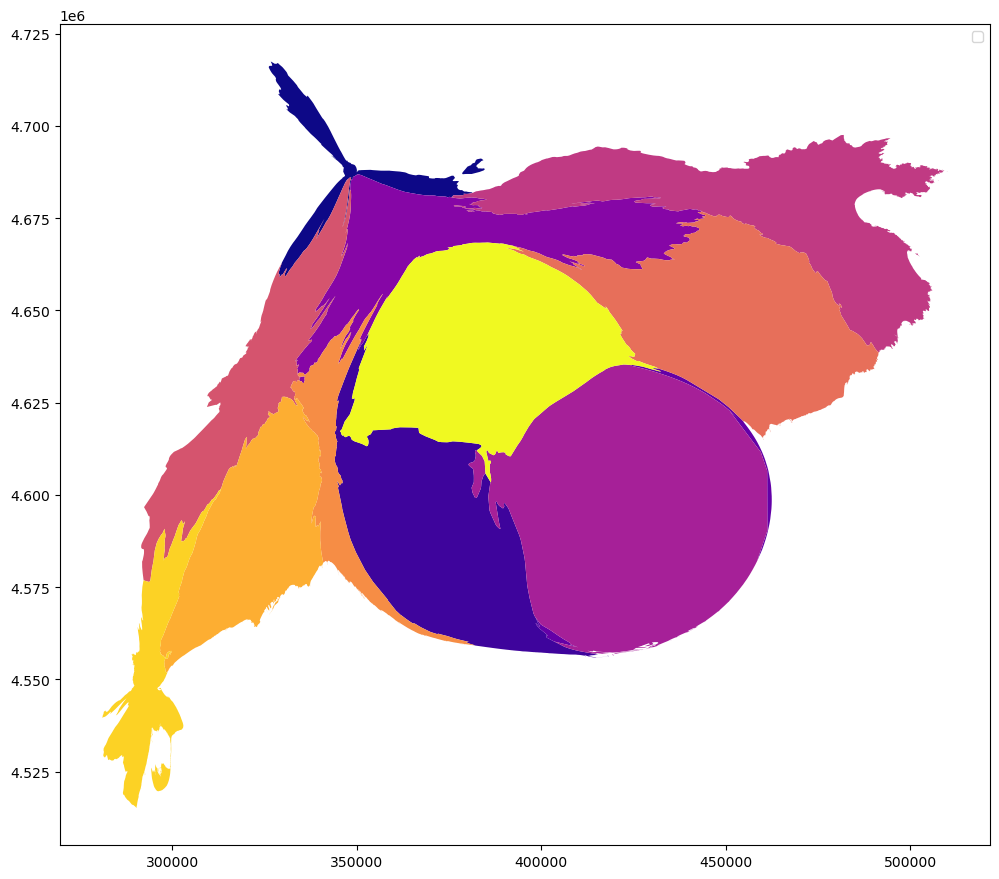

In [61]:
geoms=list(pop_nums.geometry)
factor=pop_nums['Pop'].to_numpy()
fig, ax = plt.subplots(figsize=(12,12))
c= cartogram.Cartogram(pop_nums.set_geometry("geometry").reset_index(drop=True), pop_nums['Pop'], max_iterations=25, max_average_error=0.05)
c.plot(ax=ax, cmap='plasma')
ax.legend()
plt.show()

In [ ]:
c.plot(ax=ax, cmap='plasma')
plt.show()

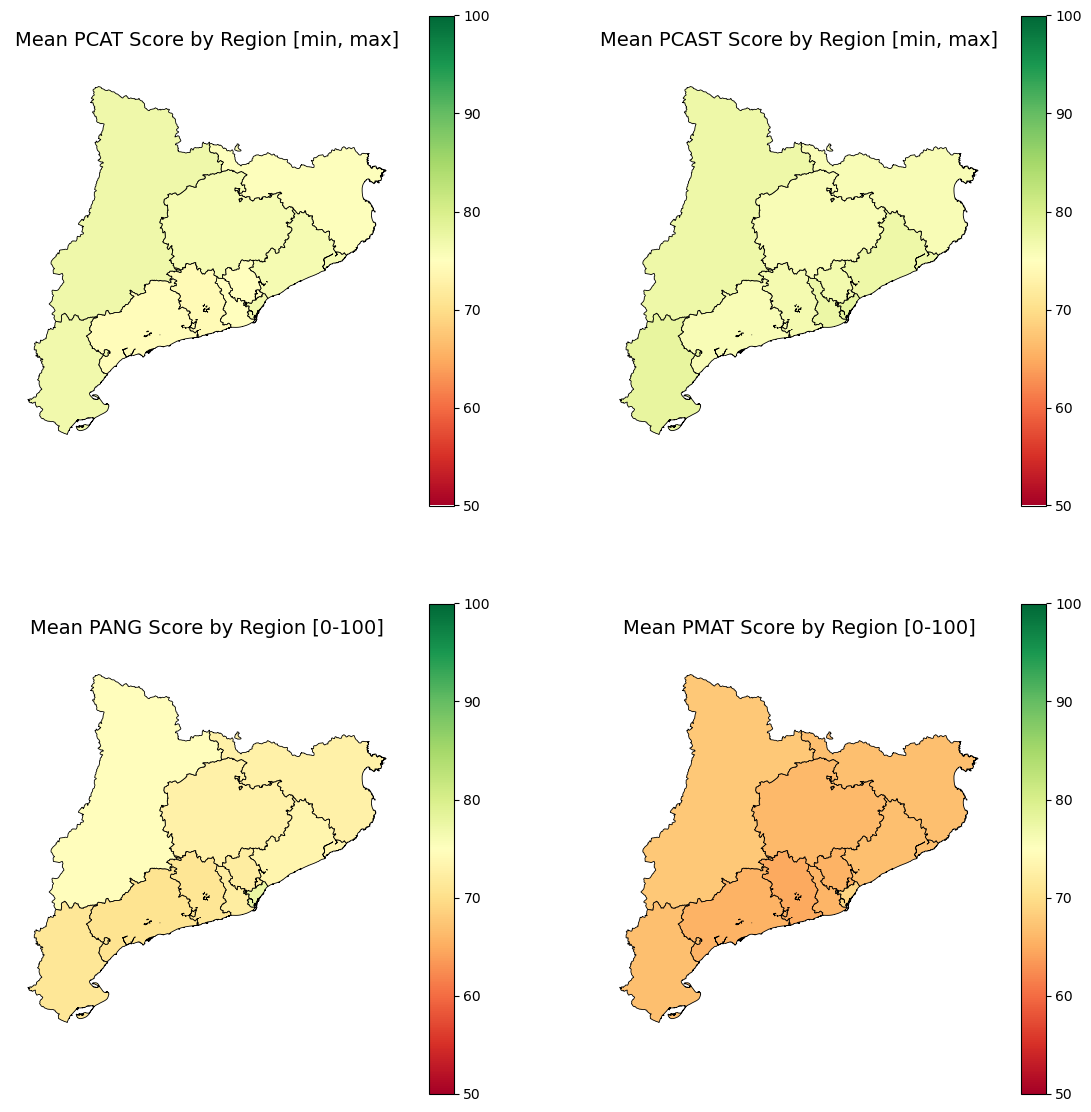

In [ ]:
fig, ((ax1, ax2),( ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 14))

#vmin = min(merged_s_2['PCAT'].min(),merged_s['PCAT'].min())
#vmax =max(merged_s_2['PCAT'].max(),merged_s['PCAT'].max())
vmin=50
vmax=100
merged_s.plot(
    column='PCAT',
    cmap='RdYlGn',
    linewidth=0.6,
    edgecolor='black',
    legend=True,
    ax=ax1,
    vmin=vmin,
    vmax=vmax
)

merged_s.plot(
    column='PCAST',
    cmap='RdYlGn',
    linewidth=0.6,
    edgecolor='black',
    legend=True,
    ax=ax2,
    vmin=vmin,
    vmax=vmax
)
merged_s.plot(
    column='PANG',
    cmap='RdYlGn',
    linewidth=0.6,
    edgecolor='black',
    legend=True,
    ax=ax3,
    vmin=vmin,
    vmax=vmax
)
merged_s.plot(
    column='PMAT',
    cmap='RdYlGn',
    linewidth=0.6,
    edgecolor='black',
    legend=True,
    ax=ax4,
    vmin=vmin,
    vmax=vmax
)
""" 
merged_p.plot(
    column='PCAT',
    cmap='RdYlGn',
    linewidth=0.6,
    edgecolor='black',
    legend=True,
    ax=ax2,
    vmin=vmin,
    vmax=vmax
    
)

vmin,vmax=0,100
merged_s.plot(
    column='PCAT',
    cmap='RdYlGn',
    linewidth=0.6,
    edgecolor='black',
    legend=True,
    ax=ax3,
    vmin=vmin,
    vmax=vmax
)
merged.plot(
    column='PCAT',
    cmap='coolwarm',
    linewidth=0.6,
    edgecolor='black',
    legend=True,
    ax=ax4,
    vmin=-10,
    vmax=10
    
) """

ax1.set_axis_off()
ax1.set_title('Mean PCAT Score by Region [min, max]', fontsize=14)
ax2.set_axis_off()
ax2.set_title('Mean PCAST Score by Region [min, max]', fontsize=14)

ax3.set_title('Mean PANG Score by Region [0-100]', fontsize=14)
ax2.set_axis_off()
ax4.set_title('Mean PMAT Score by Region [0-100]', fontsize=14)

ax3.set_axis_off()
ax4.set_axis_off()
plt.show()

NameError: name 'merged_s_2' is not defined

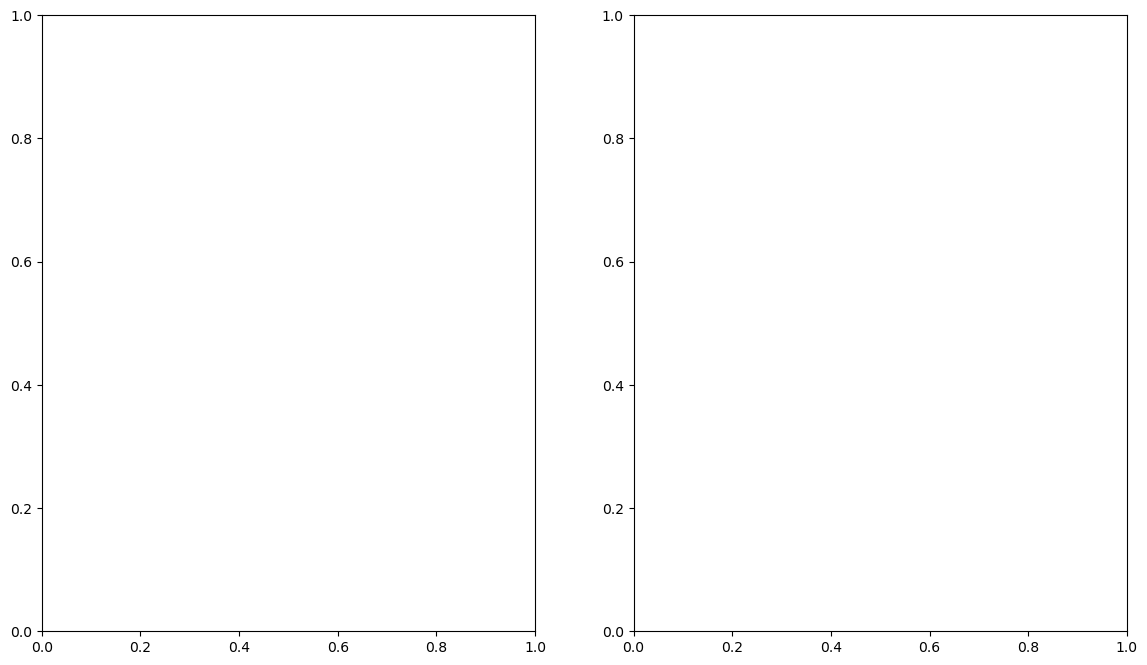

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

vmin = min(merged_s_2['PCAST'].min(),merged_s['PCAT'].min())
vmax =max(merged_s_2['PCAST'].max(),merged_s['PCAT'].max())

df_s.hist(
    column='PCAT',
    linewidth=0.6,
    edgecolor='black',
    bins=25,
    legend=True,
    ax=ax1,
    density=True
)

df_s.hist(
    column='PCAST',
    linewidth=0.6,
    edgecolor='black',
    legend=True,
    ax=ax2,
    bins=25,
    density=True
    
)
ax1.axvline(x=df_p["PCAT"].mean()-df_p["PCAT"].std(), linewidth=2,linestyle="--")
ax1.axvline(x=df_p["PCAT"].mean()+df_p["PCAT"].std(), linewidth=2,linestyle="--")
ax1.axvline(x=df_p["PCAT"].mean(), color="black" ,linewidth=2,linestyle="--")
#ax1.set_axis_off()
ax1.set_title('Mean PCAT Score by Region [min, max]', fontsize=14)
#ax2.set_axis_off()
ax2.set_title('Mean PCAST Score by Region [min, max]', fontsize=14)
ax2.axvline(x=df_p["PCAT"].mean()-df_p["PCAT"].std(), linewidth=2,linestyle="--")
ax2.axvline(x=df_p["PCAT"].mean()+df_p["PCAT"].std(), linewidth=2,linestyle="--")
ax2.axvline(x=df_p["PCAT"].mean(), color="black" ,linewidth=2,linestyle="--")

ax3.set_axis_off()
ax4.set_axis_off()
plt.show()

In [ ]:


ratio_s = (
    df_s
    .groupby("AREA_TERRITORIAL",as_index=False)["GENERE"]
    .apply(lambda x: (x == "D").sum() / x.count())
)

ratio_s

merged_s = regions.merge(
    ratio_s,
    left_on="NOMREGIO",
    right_on="AREA_TERRITORIAL",
    how="left"
)

ratio_s_2 = (
    df_s
    .groupby("AREA_TERRITORIAL",as_index=False)["GENERE"]
    .apply(lambda x: (x == "D").sum() / x.count())
)


merged_s_2 = regions.merge(
    ratio_s_2,
    left_on="NOMREGIO",
    right_on="AREA_TERRITORIAL",
    how="left"
)

ratio_p = (
    df_p
    .groupby("AREA_TERRITORIAL",as_index=False)["GENERE"]
    .apply(lambda x: (x == "D").sum() / x.count())
)


merged_p = regions.merge(
    ratio_p,
    left_on="NOMREGIO",
    right_on="AREA_TERRITORIAL",
    how="left"
)

#merged = merged_s.copy()

#merged["GENERE"] = merged_s['GENERE'] - merged_p['GENERE']

In [ ]:
fig, ((ax1, ax2),( ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 14))

vmin = min(merged_s_2['GENERE'].min(),merged_s['GENERE'].min())
vmax =max(merged_s_2['GENERE'].max(),merged_s['GENERE'].max())

merged_s.plot(
    column='GENERE',
    cmap='coolwarm',
    linewidth=0.6,
    edgecolor='black',
    legend=True,
    ax=ax1,
    vmin=vmin,
    vmax=vmax
)

merged_s_2.plot(
    column='GENERE',
    cmap='coolwarm',
    linewidth=0.6,
    edgecolor='black',
    legend=True,
    ax=ax2,
    vmin=vmin,
    vmax=vmax
    
)

vmin,vmax=0,1
merged_s.plot(
    column='GENERE',
    cmap='coolwarm',
    linewidth=0.6,
    edgecolor='black',
    legend=True,
    ax=ax3,
    vmin=vmin,
    vmax=vmax
)
merged_s_2.plot(
    column='GENERE',
    cmap='coolwarm',
    linewidth=0.6,
    edgecolor='black',
    legend=True,
    ax=ax4,
    vmin=vmin,
    vmax=vmax
    
)

ax1.set_axis_off()
ax1.set_title('GENERE Count by Region [min, max]', fontsize=14)
ax2.set_axis_off()
ax2.set_title('GENERE Count by Region [min, max]', fontsize=14)

ax3.set_title('GENERE Count by Region [0-100]', fontsize=14)
ax2.set_axis_off()
ax4.set_title('GENERE Count by Region [0-100]', fontsize=14)

ax3.set_axis_off()
ax4.set_axis_off()
plt.show()